## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
#csv_header = next(merge_df)
# Display the data table for preview

merge_df.head(-1)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [2]:
# Checking the number of mice..... THIS WORKS!!

number_of_mice_df = len(merge_df["Mouse ID"].unique())
number_of_mice_df


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

# finding how many IDs are duplicate.... THIS WORKS!!
#num_duplicate_mice_df = merge_df.loc[merge_df.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].nunique()
#  num_duplicate_mice_df


# Get mouse ID that has duplicates.... THIS WORKS!!
#duplicate_mouseID_df = merge_df.loc[merge_df.duplicated(["Mouse ID", "Timepoint"]), :]
#duplicate_mouseID_df

# This gives the duplicated set of data and keeping the last occurrences.... THIS WORKS too!! 
duplicate_mouseID_data_df = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"], keep = "last")]
duplicate_mouseID_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

#https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

# all data for duplicate mouse.... THIS WORKS!!
all_duplicate_data_df = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
all_duplicate_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# duplicate_mouse = duplicate_mouseID_data_df["Mouse ID"]=="g989"
# cleaned_mice_data_df = merge_df[merge_df({"duplicate_mouse"}).isin(duplicate_mouseID_data_df)==False]
# cleaned_mice_data_df

#  works but numbers are off............
cleaned_mice_data_df = merge_df[merge_df["Mouse ID"].isin(duplicate_mouseID_data_df)==False]
cleaned_mice_data_df
#cleaned_mice_data_df = merge_df[merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="last", inplace=False)]

#### this works but is removing all g989 data...........
#cleaned_mice_data_df = merge_df[merge_df["Mouse ID"] !="g989"]
#cleaned_mice_data_df

# make sure duplicate count is correct....
# cleaned_mice_data = duplicate_miceID_df.drop_duplicates()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

# does NOT work
# count_cleaned_data_df = cleaned_mice_data_df.count()
# count_cleaned_data_df

count_cleaned_data_df = len(cleaned_mice_data_df["Mouse ID"].unique())
count_cleaned_data_df

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# THIS WORKS!!!
tumor_volume = cleaned_mice_data_df["Tumor Volume (mm3)"]

# mean_tumor_volume = np.mean(tumor_volume)
# print(f"The mean of the tumor volume for each regimen is {mean_tumor_volume}")

# median_tumor_volume = np.median(tumor_volume)
# print(f"The median of the tumor volume for each regimen is {median_tumor_volume}")

# mode_tumor_volume = sts.mode(tumor_volume)
# #print(f"The mode of the tumor volume for each regimen is {mode_tumor_volume}")

# var_tumor_volume = np.var(tumor_volume,ddof=0)
# #print(f"The variance of the tumor volume for each regimen is {var_tumor_volume}")

# std_tumor_volume = np.std(tumor_volume,ddof=0)
# #print(f"The standard deviation of the tumor volume for each regimen is {sd_tumor_volume}")



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# THIS WORKS!!!
regimen = cleaned_mice_data_df["Drug Regimen"].value_counts()
mean_tumor_volume = cleaned_mice_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = cleaned_mice_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_volume = cleaned_mice_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_volume = cleaned_mice_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = cleaned_mice_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_table_df = pd.DataFrame({"Drug Regimen": regimen, "Mean": mean_tumor_volume, "Median": median_tumor_volume, "Variance": var_tumor_volume, "Std. Dev.": std_tumor_volume, "SEM":sem_tumor_volume})
summary_table_df["Mean"]=summary_table_df["Mean"].map("{:,.2f}".format)
summary_table_df["Median"]=summary_table_df["Median"].map("{:,.2f}".format)
summary_table_df["Variance"]=summary_table_df["Variance"].map("{:,.2f}".format)
summary_table_df["Std. Dev."]=summary_table_df["Std. Dev."].map("{:,.2f}".format)
summary_table_df["SEM"]=summary_table_df["SEM"].map("{:,.2f}".format)

# Assemble the resulting series into a single summary dataframe.
summary_table_df


,Drug Regimen,Mean,Median,Variance,Std. Dev.,SEM
Capomulin,230,40.68,41.56,24.95,4.99,0.33
Ceftamin,178,52.59,51.78,39.29,6.27,0.47
Infubinol,178,52.88,51.82,43.13,6.57,0.49
Ketapril,188,55.24,53.70,68.55,8.28,0.60
Naftisol,186,54.33,52.51,66.17,8.13,0.60
Placebo,181,54.03,52.29,61.17,7.82,0.58
Propriva,161,52.32,50.85,42.35,6.51,0.51
Ramicane,228,40.22,40.67,23.49,4.85,0.32
Stelasyn,181,54.23,52.43,59.45,7.71,0.57
Zoniferol,182,53.24,51.82,48.53,6.97,0.52


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_df = summary_table_df[["Mean", "Median", "Variance", "Std. Dev.", "SEM"]]
summary_table_df

,Mean,Median,Variance,Std. Dev.,SEM
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52


## Bar and Pie Charts

In [70]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# THIS WORKS... GIVES COUNT PER REGIMEN
mice_count_df = cleaned_mice_data_df.groupby("Drug Regimen")["Mouse ID"].nunique()
#mice_count_df

# THIS WORKS... shows in nice table
mice_per_regimen_table_df = pd.DataFrame({"Total Count": mice_count_df})
mice_per_regimen_table_df["Total Count"]=mice_per_regimen_table_df["Total Count"].map("{:,.0f}".format)
mice_per_regimen_table_df



,Total Count
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


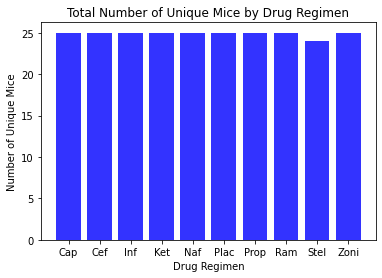

In [89]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#drug_regimen = cleaned_mice_data_df["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

mice = [25, 25, 25, 25, 25, 25, 25, 25, 24, 25]

x_axis = np.arange(len(mice))

#plt.bar(x_axis, mice)

plt.bar(x_axis, mice, color="b", alpha=0.8, align="center")

x_labels = ["Cap", "Cef", "Inf", "Ket", "Naf", "Plac", "Prop", "Ram", "Stel", "Zoni"]
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_labels)
plt.title("Total Number of Unique Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
